In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
try: 
   flights = pd.read_csv("./flights.csv")
   hotels = pd.read_csv("./hotels.csv")
   users = pd.read_csv("./users.csv")

except FileNotFoundError:
  print("File not Found!")

In [4]:
print("Flights Dataset")
display(flights.head())
print(flights.info())

Flights Dataset


,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB
None


In [5]:
print("Hotels Dataset")
display(hotels.head())
print(hotels.info())

Hotels Dataset


,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB
None


In [6]:
print("Users Dataset")
display(users.head())
print(users.info())

Users Dataset


,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB
None


In [7]:
# checking for missing values
print("Flights Missing Values:\n", flights.isnull().sum())
print("\nHotels Missing Values:\n", hotels.isnull().sum())
print("\nUsers Missing Values:\n", users.isnull().sum())

Flights Missing Values:
 travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

Hotels Missing Values:
 travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

Users Missing Values:
 code       0
company    0
name       0
gender     0
age        0
dtype: int64


In [8]:
display(flights.describe())
display(hotels.describe())
display(users.describe())

,travelCode,userCode,price,time,distance
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000
mean,67971.500000,667.505495,957.37503,1.421147,546.955535
std,39243.724665,389.523127,362.31189,0.542541,208.851288
min,0.000000,0.000000,301.51000,0.440000,168.220000
25%,33985.750000,326.000000,672.66000,1.040000,401.660000
50%,67971.500000,659.000000,904.00000,1.460000,562.140000
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000


,travelCode,userCode,days,price,total
count,40552.000000,40552.000000,40552.000000,40552.000000,40552.000000
mean,67911.794461,666.963726,2.499679,214.439554,536.229513
std,39408.199333,391.136794,1.119326,76.742305,319.331482
min,0.000000,0.000000,1.000000,60.390000,60.390000
25%,33696.750000,323.000000,1.000000,165.990000,247.620000
50%,67831.000000,658.000000,2.000000,242.880000,495.240000
75%,102211.250000,1013.000000,4.000000,263.410000,742.860000
max,135942.000000,1339.000000,4.000000,313.020000,1252.080000


,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


In [9]:
#Flight delay distribution
if 'delay' in flights.columns:
    sns.countplot(x='delay', data=flights)
    plt.title("Flight Delay Distribution")
    plt.show()


In [10]:
#Airline-wise flight count
if 'airline' in flights.columns:
    flights['airline'].value_counts().plot(kind='bar', figsize=(10,4))
    plt.title("Flights per Airline")
    plt.show()

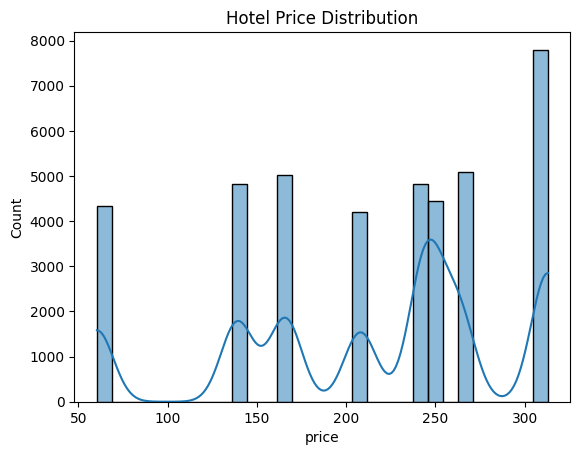

In [11]:
#Hotel price distribution
if 'price' in hotels.columns:
    sns.histplot(hotels['price'], bins=30, kde=True)
    plt.title("Hotel Price Distribution")
    plt.show()

In [12]:
#Hotel ratings
if 'rating' in hotels.columns:
    sns.boxplot(x=hotels['rating'])
    plt.title("Hotel Ratings")
    plt.show()

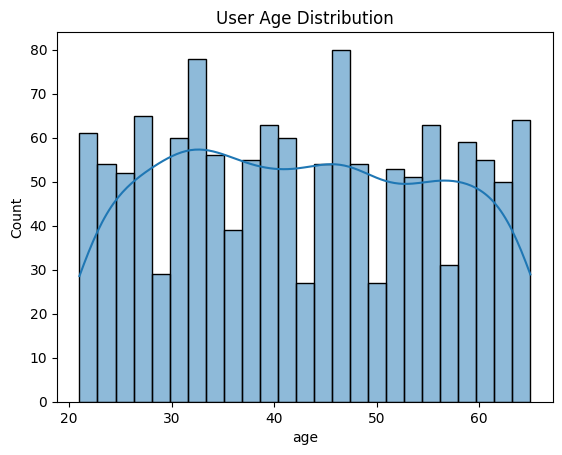

In [13]:
#User age distribution
if 'age' in users.columns:
    sns.histplot(users['age'], bins=25, kde=True)
    plt.title("User Age Distribution")
    plt.show()

In [14]:
#User location
if 'location' in users.columns:
    users['location'].value_counts().head(10).plot(kind='bar')
    plt.title("Top User Locations")
    plt.show()

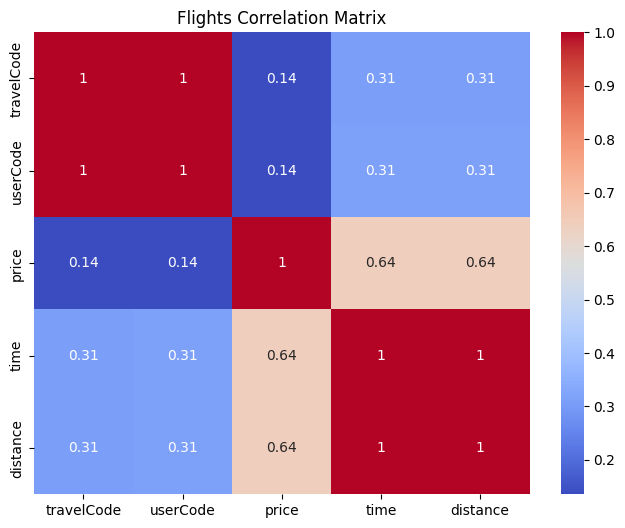

In [15]:
#Correlation analysis
plt.figure(figsize=(8,6))
sns.heatmap(flights.select_dtypes(include=np.number).corr(),
            annot=True, cmap='coolwarm')
plt.title("Flights Correlation Matrix")
plt.show()

In [16]:
flights.to_csv("cleaned_flights.csv", index=False)
hotels.to_csv("cleaned_hotels.csv", index=False)
users.to_csv("cleaned_users.csv", index=False)

In [17]:
# Machine Learning: Filghts

In [18]:
drop_cols = ['userCode', 'travelCode']
flights = flights.drop(columns=drop_cols, errors='ignore')


In [19]:
flights['date'] = pd.to_datetime(flights['date'])

flights['day'] = flights['date'].dt.day
flights['month'] = flights['date'].dt.month
flights['year'] = flights['date'].dt.year

flights.drop(columns=['date'], inplace=True)


In [20]:
X = flights.drop('price', axis=1)
y = flights['price']


In [21]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns


In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [25]:
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
y_pred = model.predict(X_test)


In [27]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 81.3212054808731
MSE: 10640.54187256544
RMSE: 103.1530022469799
R2 Score: 0.9192486440722047


In [28]:
from sklearn.ensemble import RandomForestRegressor

model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("RF R2:", r2_score(y_test, y_pred_rf))


RF R2: 0.9999973968462361


In [29]:
new_flight = pd.DataFrame({
    'from': ['Recife (PE)'],
    'to': ['Florianopolis (SC)'],
    'flightType': ['firstClass'],
    'agency': ['FlyingDrops'],
    'time': [1.76],
    'distance': [1434.38],
    'day': [26],
    'month': [9],
    'year': [2019]
})

predicted_price = model.predict(new_flight)[0]
print(f"Predicted Flight Price: {predicted_price:.2f}")



Predicted Flight Price: 4784.09


In [31]:
import joblib
import json

joblib.dump(model_rf, 'flight_price_model.pkl')

meta_data = {
    "columns": [
        'from', 'to', 'flightType', 'agency', 'time', 'distance', 
        'day', 'month', 'year'
    ]
}

with open('model_metadata.json', 'w') as f:
    json.dump(meta_data, f)

print("✅ Model and metadata saved successfully!")

✅ Model and metadata saved successfully!


In [30]:
import joblib 

joblib.dump(model_rf, 'flight_price_model.pkl')
import json
columns_info = {
    "categorical_cols": list(categorical_cols),
    "numerical_cols": list(numerical_cols)
}
with open('model_columns.json', 'w') as f:
    json.dump(columns_info, f)

In [32]:
%%writefile api.py
import pandas as pd
import joblib
import json
from flask import Flask, request, jsonify

app = Flask(__name__)

# --- Load Artifacts ---
try:
    model = joblib.load('flight_price_model.pkl')
    with open('model_metadata.json', 'r') as f:
        meta_data = json.load(f)
    expected_columns = meta_data['columns']
    print("✅ Model and metadata loaded.")
except FileNotFoundError:
    print("❌ Error: Artifacts not found. Please run Step 1 to save model/metadata.")
    model = None

@app.route('/')
def home():
    return "Voyage Analytics Flight Price API is Running!"

@app.route('/predict', methods=['POST'])
def predict():
    if not model:
        return jsonify({'error': 'Model not loaded'}), 500
    
    try:
        # 1. Get JSON data
        req_data = request.get_json()
        
        # 2. Convert to DataFrame (ensuring correct column order)
        # We wrap scalar values in lists ([value]) to create a valid DataFrame
        input_data = pd.DataFrame({col: [req_data.get(col)] for col in expected_columns})
        
        # 3. Predict (Pipeline handles preprocessing automatically)
        prediction = model.predict(input_data)[0]
        
        return jsonify({
            'status': 'success',
            'predicted_price': float(prediction)
        })

    except Exception as e:
        return jsonify({'status': 'error', 'message': str(e)}), 400

if __name__ == '__main__':
    # Run on port 5000
    app.run(host='0.0.0.0', port=5000, debug=True)

Writing api.py


In [2]:
import requests

url = "http://127.0.0.1:5000/predict"

payload = {
    "from": "Recife (PE)",
    "to": "Florianopolis (SC)",
    "flightType": "firstClass",
    "agency": "FlyingDrops",
    "time": 1.76,
    "distance": 1434.38,
    "day": 26,
    "month": 9,
    "year": 2019
}

try:
    response = requests.post(url, json=payload)
    print("Response Status:", response.status_code)
    print("API Output:", response.json())
except requests.exceptions.ConnectionError:
    print("❌ Could not connect. Ensure 'python api.py' is running in the terminal.")

Response Status: 200
API Output: {'predicted_price': 1444.451400000002, 'status': 'success'}


In [34]:
%%writefile Dockerfile
FROM python:3.9-slim

WORKDIR /app
COPY api.py .
COPY flight_price_model.pkl .
COPY model_metadata.json .

RUN pip install flask pandas joblib scikit-learn requests

EXPOSE 5000

CMD ["python", "api.py"]

Writing Dockerfile


In [1]:
%%writefile deployment.yaml
apiVersion: apps/v1
kind: Deployment
metadata:
  name: voyage-api-deployment
spec:
  replicas: 2  # Run 2 copies of the container for scalability
  selector:
    matchLabels:
      app: voyage-api
  template:
    metadata:
      labels:
        app: voyage-api
    spec:
      containers:
      - name: voyage-api
        image: voyage-api:latest
        imagePullPolicy: Never  # IMPORTANT: Use the local image we just built, don't try to download it
        ports:
        - containerPort: 5000

Writing deployment.yaml


In [2]:
%%writefile service.yaml
apiVersion: v1
kind: Service
metadata:
  name: voyage-api-service
spec:
  type: LoadBalancer  # Exposes the service to your local machine
  selector:
    app: voyage-api
  ports:
    - protocol: TCP
      port: 5000      # Port accessible on your computer
      targetPort: 5000 # Port the container is listening on

Writing service.yaml


In [5]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

try:
    flights = pd.read_csv("cleaned_flights.csv")
except FileNotFoundError:
    flights = pd.read_csv("flights.csv") 
    if 'date' in flights.columns:
        flights['date'] = pd.to_datetime(flights['date'])
        flights['day'] = flights['date'].dt.day
        flights['month'] = flights['date'].dt.month
        flights['year'] = flights['date'].dt.year
        flights.drop(columns=['date'], inplace=True)
    if 'userCode' in flights.columns:
        flights.drop(columns=['userCode', 'travelCode'], errors='ignore', inplace=True)

X = flights.drop('price', axis=1)
y = flights['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

mlflow.set_experiment("Voyage_Flight_Price_Prediction")

n_estimators = 200
max_depth = 15

print("🚀 Starting MLFlow Run...")

with mlflow.start_run():
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("model_type", "RandomForestRegressor")
    
    model_rf_tracked = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        ))
    ])

    print("Training model...")
    model_rf_tracked.fit(X_train, y_train)
    
    y_pred_tracked = model_rf_tracked.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred_tracked)
    mse = mean_squared_error(y_test, y_pred_tracked)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_tracked)
    
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    
    mlflow.sklearn.log_model(model_rf_tracked, "model")
    
    print("✅ Run Complete. Metrics and Model logged to MLFlow.")

🚀 Starting MLFlow Run...
Training model...


2026/01/19 22:47:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


MAE: 0.98
RMSE: 4.20


2026/01/19 22:47:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Run Complete. Metrics and Model logged to MLFlow.


In [8]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# 1. Load Data
try:
    users = pd.read_csv("cleaned_users.csv")
except:
    users = pd.read_csv("users.csv")

# 2. Filter Data (Remove 'none' or 'nan' genders to improve accuracy)
users_clean = users[users['gender'].isin(['male', 'female'])]

X = users_clean['name']
y = users_clean['gender']

# 3. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build NLP Pipeline
# We look at character patterns (e.g., names ending in 'a', 'ine', 'o')
model_gender_name = make_pipeline(
    CountVectorizer(analyzer='char', ngram_range=(2, 3)), 
    MultinomialNB()
)

print("Training Name-Based Gender Classifier...")
model_gender_name.fit(X_train, y_train)

# 5. Evaluate
preds = model_gender_name.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"✅ Accuracy: {acc:.2f}")  # Expect > 75%

# 6. Save
joblib.dump(model_gender_name, 'gender_classification_model.pkl')
print("💾 Model overwritten with Name-Based Classifier.")

Training Name-Based Gender Classifier...
✅ Accuracy: 0.80
💾 Model overwritten with Name-Based Classifier.
